# Problem Statement

Xente is an e-commerce and financial services app with over 10,000 users in Uganda. To help protect its customers and reduce financial loss, Xente wants to build a machine learning model that can detect fraudulent transactions.

This project will use a dataset of around 140,000 transactions that took place between 15 November 2018 and 15 March 2019. The goal is to train a model that can identify which transactions are likely to be fraud.

By detecting fraud early, Xente can make its platform safer and more reliable for its users.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
df = pd.read_csv('training.csv')

In [3]:
df.head()

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2018-11-15T02:18:49Z,2,0
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2018-11-15T02:19:08Z,2,0
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2018-11-15T02:44:21Z,2,0
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,21800,2018-11-15T03:32:55Z,2,0
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644,2018-11-15T03:34:21Z,2,0


## Data Understanding and Profiling

The training dataset provided represent over 95,000 transactions that took place in four months, between November 15, 2018 and March 15, 2019

In [4]:
df.shape

(95662, 16)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95662 entries, 0 to 95661
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   TransactionId         95662 non-null  object 
 1   BatchId               95662 non-null  object 
 2   AccountId             95662 non-null  object 
 3   SubscriptionId        95662 non-null  object 
 4   CustomerId            95662 non-null  object 
 5   CurrencyCode          95662 non-null  object 
 6   CountryCode           95662 non-null  int64  
 7   ProviderId            95662 non-null  object 
 8   ProductId             95662 non-null  object 
 9   ProductCategory       95662 non-null  object 
 10  ChannelId             95662 non-null  object 
 11  Amount                95662 non-null  float64
 12  Value                 95662 non-null  int64  
 13  TransactionStartTime  95662 non-null  object 
 14  PricingStrategy       95662 non-null  int64  
 15  FraudResult        

In [6]:
df.columns

Index(['TransactionId', 'BatchId', 'AccountId', 'SubscriptionId', 'CustomerId',
       'CurrencyCode', 'CountryCode', 'ProviderId', 'ProductId',
       'ProductCategory', 'ChannelId', 'Amount', 'Value',
       'TransactionStartTime', 'PricingStrategy', 'FraudResult'],
      dtype='object')

## Data Dictionary

| Column Name            | Data Type     | Description                                                        |
| ---------------------- | ------------- | ------------------------------------------------------------------ |
| `TransactionId`        | String / ID   | Unique identifier for each transaction.                            |
| `BatchId`              | String / ID   | Identifier for a batch of transactions processed together.         |
| `AccountId`            | String / ID   | Unique ID of the account involved in the transaction.              |
| `SubscriptionId`       | String / ID   | Identifier for the subscription linked to the transaction.         |
| `CustomerId`           | String / ID   | Unique ID of the customer performing the transaction.              |
| `CurrencyCode`         | String        | Currency used in the transaction (e.g., UGX, USD).                 |
| `CountryCode`          | String        | Country code where the transaction occurred (e.g., UG for Uganda). |
| `ProviderId`           | String / ID   | Identifier for the service provider or merchant.                   |
| `ProductId`            | String / ID   | Unique ID of the product or service purchased.                     |
| `ProductCategory`      | String        | Category or type of product involved in the transaction.           |
| `ChannelId`            | String / ID   | Identifier for the channel used (e.g., mobile app, web, USSD).     |
| `Amount`               | Float         | Amount of money charged to the customer.                           |
| `Value`                | Float         | Value or cost of the product or service.                           |
| `TransactionStartTime` | DateTime      | Timestamp indicating when the transaction started.                 |
| `PricingStrategy`      | String        | Strategy used to price the transaction (e.g., discount, markup).   |
| `FraudResult`          | Integer (0/1) | Label indicating if the transaction was fraudulent (1) or not (0). |


### Data Preparation

In [7]:
df.isnull().sum()

TransactionId           0
BatchId                 0
AccountId               0
SubscriptionId          0
CustomerId              0
CurrencyCode            0
CountryCode             0
ProviderId              0
ProductId               0
ProductCategory         0
ChannelId               0
Amount                  0
Value                   0
TransactionStartTime    0
PricingStrategy         0
FraudResult             0
dtype: int64

In [8]:
df['FraudResult'].value_counts()

FraudResult
0    95469
1      193
Name: count, dtype: int64

In [9]:
x = df.drop('FraudResult', axis=1)
y = df.FraudResult

In [10]:
x.head()

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2018-11-15T02:18:49Z,2
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2018-11-15T02:19:08Z,2
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2018-11-15T02:44:21Z,2
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,21800,2018-11-15T03:32:55Z,2
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644,2018-11-15T03:34:21Z,2


In [11]:
y

0        0
1        0
2        0
3        0
4        0
        ..
95657    0
95658    0
95659    0
95660    0
95661    0
Name: FraudResult, Length: 95662, dtype: int64

In [18]:
# encoding before balancing dataset

from sklearn.preprocessing import LabelEncoder

x_encoded = x.copy()

x_encoded = x.drop(columns=['TransactionId', 'BatchId', 'TransactionStartTime'])

for col in x_encoded.select_dtypes(include='object').columns:
    x_encoded[col] = LabelEncoder().fit_transform(x_encoded[col])

In [19]:
# balancing dataset using SMOTE

from imblearn.over_sampling import SMOTE
smote = SMOTE()
x_resampled, y_resampled = smote.fit_resample(x_encoded, y)

print(x_resampled)
print(y_resampled)

        AccountId  SubscriptionId  CustomerId  CurrencyCode  CountryCode  \
0            2490            3535        2584             0          256   
1            3219            2366        2584             0          256   
2            2713             996        2806             0          256   
3            3351             974        3733             0          256   
4            3219            2366        3733             0          256   
...           ...             ...         ...           ...          ...   
190933       1605             784        1744             0          256   
190934        735            1223         919             0          256   
190935        497            1532         705             0          256   
190936        642            2613         835             0          256   
190937       2737            1665        2829             0          256   

        ProviderId  ProductId  ProductCategory  ChannelId     Amount    Value  \
0     

## Model Building

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

In [16]:
model = make_pipeline(StandardScaler(),
        LogisticRegression(max_iter=1000, solver='lbfgs'))

model.fit(x_resampled, y_resampled)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression(max_iter=1000))])

## Model Evaluation

In [17]:
test = pd.read_csv('Test.csv')
test.head()

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy
0,TransactionId_50600,BatchId_35028,AccountId_2441,SubscriptionId_4426,CustomerId_2857,UGX,256,ProviderId_5,ProductId_3,airtime,ChannelId_3,1000.0,1000,2019-02-13T10:01:40Z,4
1,TransactionId_95109,BatchId_45139,AccountId_3439,SubscriptionId_2643,CustomerId_3874,UGX,256,ProviderId_5,ProductId_15,financial_services,ChannelId_3,2000.0,2000,2019-02-13T10:02:12Z,2
2,TransactionId_47357,BatchId_74887,AccountId_4841,SubscriptionId_3829,CustomerId_2857,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-50.0,50,2019-02-13T10:02:30Z,2
3,TransactionId_28185,BatchId_11025,AccountId_2685,SubscriptionId_4626,CustomerId_3105,UGX,256,ProviderId_5,ProductId_10,airtime,ChannelId_3,3000.0,3000,2019-02-13T10:02:38Z,4
4,TransactionId_22140,BatchId_29804,AccountId_4841,SubscriptionId_3829,CustomerId_3105,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-60.0,60,2019-02-13T10:02:58Z,2


In [39]:
x_test_original = test[['TransactionId', 'ProductCategory', 'Amount']].copy()

x_test = test.drop(columns=['TransactionId', 'BatchId', 'TransactionStartTime'])

for col in x_test.select_dtypes(include='object').columns:
    x_test[col] = LabelEncoder().fit_transform(x_test[col])

In [40]:
x_test.isnull().sum()

AccountId          0
SubscriptionId     0
CustomerId         0
CurrencyCode       0
CountryCode        0
ProviderId         0
ProductId          0
ProductCategory    0
ChannelId          0
Amount             0
Value              0
PricingStrategy    0
dtype: int64

In [48]:
predictions = model.predict(x_test)

predicted_df = pd.DataFrame(predictions, columns=['PredictedFraud'], index=x_test.index)

results = pd.concat([x_test_original, predicted_df], axis=1)

In [49]:
results.tail(10)

,TransactionId,ProductCategory,Amount,PredictedFraud
45009,TransactionId_46151,airtime,10000.0,1
45010,TransactionId_109121,financial_services,-5000.0,0
45011,TransactionId_30094,airtime,10000.0,0
45012,TransactionId_73077,financial_services,-5000.0,0
45013,TransactionId_135846,airtime,10000.0,0
45014,TransactionId_116198,financial_services,-5000.0,0
45015,TransactionId_24829,airtime,10000.0,0
45016,TransactionId_102920,airtime,10000.0,0
45017,TransactionId_128439,financial_services,-5000.0,0
45018,TransactionId_45927,airtime,3500.0,0


In [50]:
# importing predicted result

results.to_csv('Fraud_Predictions.csv', index=False)

## Result Visualization

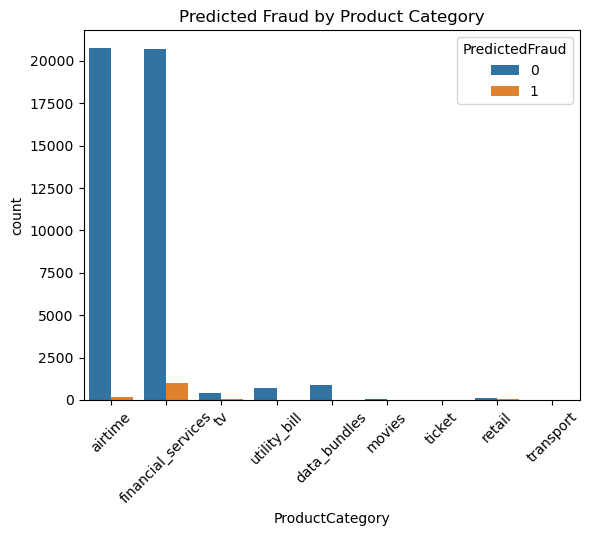

In [51]:
sb.countplot(data=results, x='ProductCategory', hue='PredictedFraud')
plt.title('Predicted Fraud by Product Category')
plt.xticks(rotation=45)
plt.show()

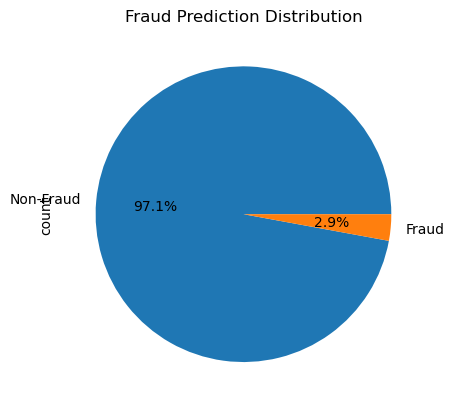

In [57]:
results['PredictedFraud'].value_counts().plot.pie(autopct='%1.1f%%', labels=['Non-Fraud', 'Fraud'])
plt.title('Fraud Prediction Distribution')
plt.show()